In [495]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [496]:
file = '../Resources/2013_Expenditures_Contributions_Merge.csv'
IC_2013 = pd.read_csv(file,index_col=False)
uncleaned = pd.read_csv(file,index_col=False)
IC_2013.head()

,Election,CandidateID,CandidateName,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,PrevAmt,TotalAmount,ExpenditureAmount,PurposeCode,Purpose
0,2013,1752,"Abiodun,Laurel-Smith",9/7/2013,Corporation,New York,NY,10001,0.0,0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",1/17/2012,Corporation,New York,NY,10019,0.0,0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",7/12/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",4/15/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",7/8/2013,Limited Liability Company,New York,NY,10018,0.0,0,0.0,0.0,57,Other,Other: explntion


In [497]:
IC_2013['ZipCode'] = IC_2013['ZipCode'].apply(str)
IC_2013['Date'] = pd.to_datetime(IC_2013['Date'])
IC_2013.dropna()

,Election,CandidateID,CandidateName,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,PrevAmt,TotalAmount,ExpenditureAmount,PurposeCode,Purpose
0,2013,1752,"Abiodun,Laurel-Smith",2013-09-07,Corporation,New York,NY,10001,0.0,0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",2012-01-17,Corporation,New York,NY,10019,0.0,0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",2013-07-12,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",2013-04-15,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",2013-07-08,Limited Liability Company,New York,NY,10018,0.0,0,0.0,0.0,57,Other,Other: explntion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13155,2013,FI,"John,Liu",2012-03-23,Other,New York,NY,10036,0.0,0,0.0,0.0,17861,Professional Services,Prof. Srvcs.
13156,2013,FI,"John,Liu",2012-04-11,Other,New York,NY,10036,0.0,0,0.0,0.0,23053,Professional Services,Prof. Srvcs.
13157,2013,FI,"John,Liu",2012-05-03,Other,New York,NY,10036,0.0,0,0.0,0.0,14896,Professional Services,Prof. Srvcs.
13158,2013,FI,"John,Liu",2013-01-02,Other,New York,NY,10036,0.0,0,0.0,0.0,50000,Professional Services,Prof. Srvcs.


In [498]:
IC_2013_df = IC_2013.drop(columns=['Election','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,Amount,MatchAmt,TotalAmount,ExpenditureAmount
CandidateName,,,,
"de Blasio, Bill",11073226.59,926504,1.497036e+07,0
"Quinn, Christine C",6096021.97,527421,9.427039e+06,0
"Thompson, Jr., William C",4911412.70,417722,6.111452e+06,0
"Liu, John C",239200.00,0,4.045000e+05,0
"Weiner, Anthony D",225088.74,0,2.301887e+05,0
"Lhota, Joseph J",41414.00,0,4.141400e+04,0
"Albanese, Sal F",27178.00,0,3.092800e+04,0
"Hidary, Jack D",1500.00,0,2.500000e+03,0
"Salgado, Erick J",675.00,0,6.750000e+02,0


In [499]:
IC_2013_df = IC_2013_df.groupby(['ZipCode','Date','ContributerType','City','State']).sum('TotalAmount')

In [500]:
IC_2013_df

Amount  MatchAmt  \
ZipCode Date       ContributerType City     State                     
00901   2012-01-17 Corporation     San Juan PR        0.0         0   
00907   2011-10-24 Corporation     San Juan PR        0.0         0   
        2011-11-14 Corporation     San Juan PR        0.0         0   
        2013-11-07 Corporation     San Juan PR        0.0         0   
        2013-12-11 Corporation     San Juan PR        0.0         0   
...                                                   ...       ...   
nan     2013-11-15 Individual      BROOKLYN NY        0.0         0   
        2013-11-25 Corporation     New York NY        0.0         0   
        2013-12-16 Corporation     New York NY        0.0         0   
        2014-01-10 Corporation     New York NY        0.0         0   
                   Individual      Paterson NY        0.0         0   

                                                   TotalAmount  \
ZipCode Date       ContributerType City     State                
00901   2012-01-17 Corporation     San Juan PR             0.0   
00907   2011-10-24 Corporation     San Juan PR             0.0   
        2011-11-14 Corporation     San Juan PR             0.0   
        2013-11-07 Corporation     San Juan PR             0.0   
        2013-12-11 Corporation     San Juan PR             0.0   
...                                                        ...   
nan     2013-11-15 Individual      BROOKLYN NY             0.0   
        2013-11-25 Corporation     New York NY             0.0   
        2013-12-16 Corporation     New York NY             0.0   
        2014-01-10 Corporation     New York NY             0.0   
                   Individual      Paterson NY             0.0   

                                                   ExpenditureAmount  
ZipCode Date       ContributerType City     State                     
00901   2012-01-17 Corporation     San Juan PR                   644  
00907   2011-10-24 Corporation     San Juan PR                   186  
        2011-11-14 Corporation     San Juan PR                   188  
        2013-11-07 Corporation     San Juan PR                  1281  
        2013-12-11 Corporation     San Juan PR                  -256  
...                                                              ...  
nan     2013-11-15 Individual      BROOKLYN NY                  2227  
        2013-11-25 Corporation     New York NY                 35635  
        2013-12-16 Corporation     New York NY                  8095  
        2014-01-10 Corporation     New York NY                  8350  
                   Individual      Paterson NY                     1  

[29474 rows x 4 columns]

In [501]:
IC_2013_df = IC_2013_df.reset_index()
IC_2013_df

,ZipCode,Date,ContributerType,City,State,Amount,MatchAmt,TotalAmount,ExpenditureAmount
0,00901,2012-01-17,Corporation,San Juan,PR,0.0,0,0.0,644
1,00907,2011-10-24,Corporation,San Juan,PR,0.0,0,0.0,186
2,00907,2011-11-14,Corporation,San Juan,PR,0.0,0,0.0,188
3,00907,2013-11-07,Corporation,San Juan,PR,0.0,0,0.0,1281
4,00907,2013-12-11,Corporation,San Juan,PR,0.0,0,0.0,-256
...,...,...,...,...,...,...,...,...,...
29469,nan,2013-11-15,Individual,BROOKLYN,NY,0.0,0,0.0,2227
29470,nan,2013-11-25,Corporation,New York,NY,0.0,0,0.0,35635
29471,nan,2013-12-16,Corporation,New York,NY,0.0,0,0.0,8095
29472,nan,2014-01-10,Corporation,New York,NY,0.0,0,0.0,8350


In [502]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df_enc['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df_enc['City'] = le.fit_transform(IC_2013_df['City'])
# IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df_enc['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
# IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df_enc[features] = scaler.fit_transform(IC_2013_df_enc[features])
IC_2013_df_enc.head()

,ZipCode,Date,ContributerType,City,State,Amount,MatchAmt,TotalAmount,ExpenditureAmount
0,0,764,4,1583,61,0.0,0,0.0,644
1,1,683,4,1583,61,0.0,0,0.0,186
2,1,703,4,1583,61,0.0,0,0.0,188
3,1,1403,4,1583,61,0.0,0,0.0,1281
4,1,1429,4,1583,61,0.0,0,0.0,-256


In [503]:
X = IC_2013_df_enc.drop('TotalAmount',axis = 1)
y = IC_2013_df_enc['TotalAmount']
IC_2013_df_enc.nunique()

ZipCode              2517
Date                 1451
ContributerType        12
City                 2024
State                  92
Amount                919
MatchAmt              286
TotalAmount          1274
ExpenditureAmount    2281
dtype: int64

In [504]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [505]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [506]:
regr = RandomForestRegressor()

In [507]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [508]:
y_pred = regr.predict(X_test)
print(len(y_pred))

8843


In [509]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.8557515227165321


Text(0.5, 1.0, 'R2: 0.8557515227165321')

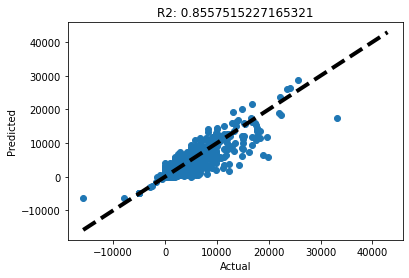

In [510]:
# %matplotlib inline
print(r_squared)
fig, ax = plt.subplots()

# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('R2: ' + str(r2_score(y_test, y_pred)))

In [523]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [524]:
pred_df.isnull().sum()

ZipCode                   0
Date                      0
ContributerType           0
City                      0
State                     0
Amount                    0
MatchAmt                  0
ExpenditureAmount         0
Predicted Total Amount    0
dtype: int64

In [525]:
pred_graph = pred_df.groupby('ZipCode').sum('Predicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [526]:
# pred_graph = pred_graph.reset_index()
pred_graph

,Date,ContributerType,City,State,Amount,MatchAmt,ExpenditureAmount,Predicted Total Amount
ZipCode,,,,,,,,
1017,1166,10,1356,102,-4650.00,0,0,-4601.500000
752,5438,35,13881,357,-4125.00,0,0,-3818.903000
1078,5034,30,9360,302,-800.00,0,0,-818.000000
674,14135,72,2912,714,-1850.00,875,1140,-435.790000
1,703,4,1583,61,0.00,0,188,0.000000
...,...,...,...,...,...,...,...,...
541,134297,701,168912,7038,123959.00,16860,348295,217994.509694
549,154974,917,208042,8670,146734.00,21194,17145,255010.933500
561,104701,645,149328,6222,202855.68,23755,29803,275997.608093
